<a href="https://colab.research.google.com/github/danadler-dev/JTB---SDSA-Paper/blob/main/ABC_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import hashlib

def compact_symbols(symbol_dict):
    """
    Compacts the keys of a dictionary to make them more readable while retaining the counts.
    Symbols with repeating characters or subgroups are compacted.

    Args:
        symbol_dict (dict): A dictionary with symbols as keys and counts as values.

    Returns:
        dict: A new dictionary with compacted keys and the same counts.
    """
    def compact(symbol):
        # Compact repeated characters (e.g., "AAA" -> "A3")
        compacted = ""
        count = 1
        for i in range(1, len(symbol)):
            if symbol[i] == symbol[i - 1]:
                count += 1
            else:
                compacted += f"{symbol[i - 1]}{count if count > 1 else ''}"
                count = 1
        compacted += f"{symbol[-1]}{count if count > 1 else ''}"

        # Compact repeated substrings (e.g., "ABABAB" -> "(AB)3")
        def compact_subgroups(s, max_passes=2):
            pattern = re.compile(r"(.+?)\1{1,}")  # Match repeated substrings
            passes = 0
            while passes < max_passes:
                match = pattern.search(s)
                if not match:
                    break
                repeated, repeats = match.group(1), len(match.group(0)) // len(match.group(1))
                s = s.replace(match.group(0), f"({repeated}){repeats}")
                passes += 1
            return s

        compacted = compact_subgroups(compacted)
        return compacted

    def shorten_symbol(symbol, max_length=15):
        """
        Shortens a symbol using a hash if its length exceeds max_length.
        """
        if len(symbol) > max_length:
            # Use a hash-based identifier
            short_hash = hashlib.md5(symbol.encode()).hexdigest()[:6]  # First 6 hex digits
            return f"H{short_hash}"
        return symbol

    # Compact and shorten symbols
    compacted_dict = {}
    for symbol, count in symbol_dict.items():
        compacted = compact(symbol)
        compacted = shorten_symbol(compacted)
        compacted_dict[compacted] = count

    return compacted_dict

Unconstrained System:


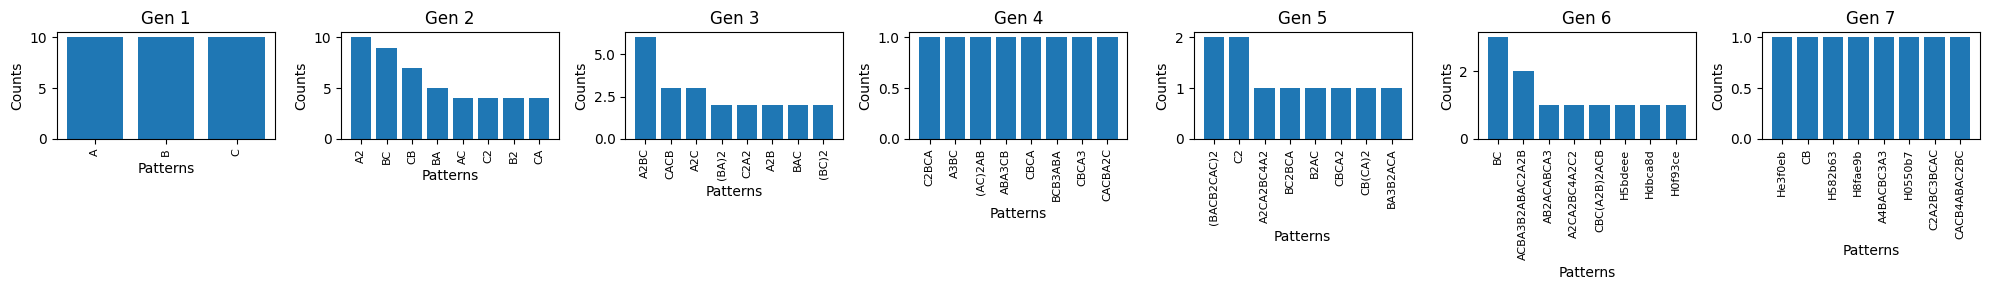

ABC System:


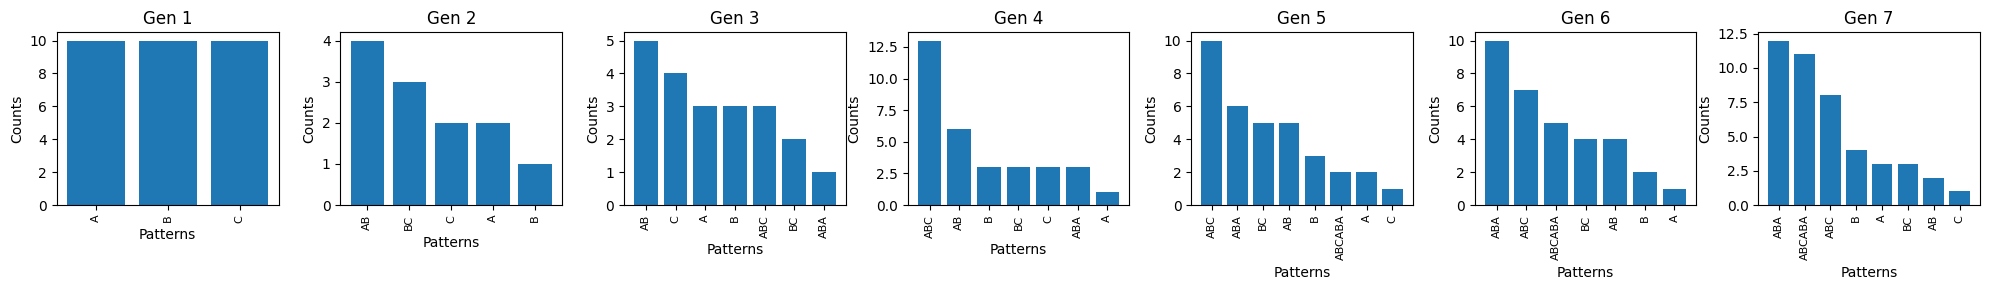


Final Results:
Unconstrained System: {'BBACBACBBCACBACBBCACCAABCCCBCABCCBCABBACBACBBCACBACBBCACCAABCCCBCABCCBCA': 1, 'CACBAAABBABACCAABBBBAABACCCAAABAABACBCBCBCBABABAAAABAABC': 1, 'ABBBAABACCCAAABAABACBABBACABCAAA': 1, 'BCBCCCAAAABCCACBBCBBBABABACAABCCCBCABCCBCABBACBACBBCACBACBBCACCAABCCCBCABCCBCA': 1, 'CABAABACBABBCAABAABACB': 1, 'CCCABABAAAABAABCBCBCBABAAACB': 1, 'AA': 2, 'BBCAABAABACBAAABACBCCCAAABAABACBCCABABAAAABAABCBCBCBABAAACB': 1, 'AAAABACBCCCAAAC': 2, 'CAABCCCBCAAACAABCCCCAABACABCAACCBCBCCBCAA': 1, 'BACBAAABBABACCAABABAABACBABC': 1, 'CCABABAAAABAABCBCBCBABAAACBA': 1, 'BBBAABACCCAAABAABACBABBACABCAAACACBAAABBABACCAAB': 1, 'CCAABCCCBCACA': 1, 'BA': 1, 'CACBBBBABACCBCBBCAABAABACBAAABACBCCCAAABAABACB': 1, 'BBBBAABACCCAAABAABACBCBCBCBABABAAAABAABC': 1, 'AAAABACBCCCAABCAABAABACBCACBBBBABACCABABAAAABAABCBCBCBABAAACB': 1, 'BBCBCAABABABBCBABAACCCACBAAABABBAC': 1, 'BBBACBACBBCACBACBBCACCAABCCCBCABCCBCA': 1, 'BBBAABACCCAAABAABACBBACBBCACBABABBCAABCCACBAC': 1, 'CCACBBBBABACCB': 1, 'BBCCC

In [ ]:
import random
import matplotlib.pyplot as plt
from collections import Counter

def simulate_case(num_generations, interactions_per_generation, regeneration_rate, initial_population, stability=None):
    """
    Simulate a system with interactions and optional stability rules.

    Args:
        num_generations (int): Number of generations to simulate.
        interactions_per_generation (int): Number of interactions per generation.
        regeneration_rate (dict): Number of each base symbol regenerated each generation.
        initial_population (list): Initial population of symbols.
        stability (dict): Stability values for compounds (optional).

    Returns:
        dict: Final population counts for the last generation.
    """
    population = initial_population.copy()

    fig, axes = plt.subplots(1, num_generations, figsize=(20, 3))
    axes = axes.flatten()

    for generation in range(num_generations):
        # Count and plot top patterns
        population_count = Counter(population)
        top_patterns = population_count.most_common(8)
        labels, counts = zip(*top_patterns) if top_patterns else ([], [])
        labels = compact_symbols(dict(top_patterns)).keys()
        ax = axes[generation]
        ax.bar(labels, counts)
        ax.set_title(f"Gen {generation + 1}")
        ax.set_xlabel("Patterns")
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels, rotation=90, fontsize=8)
        ax.set_ylabel("Counts")

        # Regenerate base elements
        for symbol, rate in regeneration_rate.items():
            population.extend([symbol] * rate)

        # Simulate interactions
        new_population = []
        for _ in range(interactions_per_generation):
#           symbol1, symbol2 = random.sample(population, 2)
            symbol1, symbol2 = random.choices(population, k=2)
            compound = "".join(symbol1 + symbol2)
            if stability is None or compound in stability:
                new_population.append(compound)
            else:
                # If the compound is invalid, add the original symbols back
                new_population.extend([symbol1, symbol2])

        # Age compounds by their stability
        aged_population = []
        for compound in new_population:
            if stability is None or random.random() < (stability.get(compound, 1) / max(stability.values())):
                aged_population.append(compound)
        population = aged_population

    # Hide unused subplot axes
    for i in range(num_generations, len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

    # Return the final population counts
    return dict(Counter(population))


# Parameters for the simulations
num_generations = 7
interactions_per_generation = 50
regeneration_rate = {"A": 5, "B": 5, "C": 5}
initial_population = ["A", "B", "C"] * 10

# Stability values for the ABC system
abc_stability = {
    "AB": 3, "BC": 3, "ABC": 5, "ABA": 6, "ABCABA":8,  # High stability for specific compounds
    "AC": 1, "A": 1, "B": 2, "C": 1  # Lower stability for others
}

# Run the unconstrained simulation (no stability rules)
print("Unconstrained System:")
unrestricted_results = simulate_case(
    num_generations, interactions_per_generation, regeneration_rate, initial_population
)

# Run the ABC system simulation (with stability rules)
print("ABC System:")
stability_results = simulate_case(
    num_generations, interactions_per_generation, regeneration_rate, initial_population, abc_stability
)

# Print final results
print("\nFinal Results:")
print("Unconstrained System:", unrestricted_results)
print("ABC System:", stability_results)


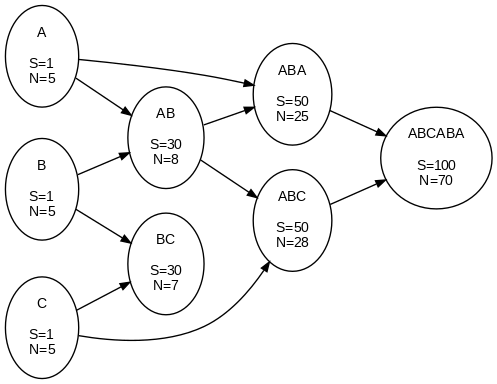

In [ ]:
# Write the graph definition to a DOT file
dot_content = """
digraph ABC_System {
    rankdir=LR;
    size="6,4!";
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=10, fontname="Arial"];
    edge [color=black, arrowsize=0.7];

    // Base elements to intermediate patterns
    A [label="A\n\nS=1\nN=5"];
    B [label="B\n\nS=1\nN=5"];
    C [label="C\n\nS=1\nN=5"];
    AB [label="AB\n\nS=30\nN=8"];
    BC [label="BC\n\nS=30\nN=7"];
    ABC [label="ABC\n\nS=50\nN=28"];
    ABA [label="ABA\n\nS=50\nN=25"];
    ABCABA [label="ABCABA\n\nS=100\nN=70"];

    // Intermediates to final patterns
    A -> AB;
    B -> AB;
    B -> BC;
    C -> BC;

    // Intermediate patterns to final patterns
    AB -> ABC;
    C -> ABC;
    AB -> ABA;
    A -> ABA;
    ABA -> ABCABA;
    ABC -> ABCABA;
}
"""

# Write the DOT content to a file
with open("abc_system.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_system.dot > abc_system.png

# Display the rendered image
from IPython.display import Image
Image('abc_system.png')


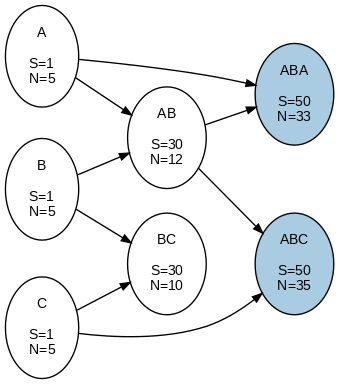

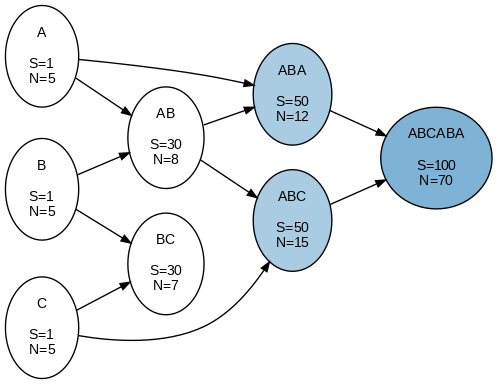

In [ ]:
# Install graphviz if not already installed
!pip install graphviz

from graphviz import Digraph
from IPython.display import display, Image
import os

# Function to create graph with common settings
def create_sda_graph(name, label):
    g = Digraph(name)
    g.attr(rankdir='LR', size="6,4!")
    g.attr('node', shape='ellipse', style='filled', fillcolor='white',
           fontsize='10', fontname='Arial')
    g.attr('edge', color='black', arrowsize='0.7')
    g.attr(label=label)
    return g

# Stage 1: Early Evolution - ABC and ABA are dominant
stage1 = create_sda_graph('stage1', '')

# Base elements
stage1.node('A1', 'A\n\nS=1\nN=5')
stage1.node('B1', 'B\n\nS=1\nN=5')
stage1.node('C1', 'C\n\nS=1\nN=5')

# First level patterns
stage1.node('AB1', 'AB\n\nS=30\nN=12')
stage1.node('BC1', 'BC\n\nS=30\nN=10')

# Second level patterns - dominant in stage 1
stage1.node('ABC1', 'ABC\n\nS=50\nN=35', fillcolor='#A9CCE3')
stage1.node('ABA1', 'ABA\n\nS=50\nN=33', fillcolor='#A9CCE3')

# Connections
stage1.edge('A1', 'AB1')
stage1.edge('B1', 'AB1')
stage1.edge('B1', 'BC1')
stage1.edge('C1', 'BC1')
stage1.edge('AB1', 'ABC1')
stage1.edge('C1', 'ABC1')
stage1.edge('AB1', 'ABA1')
stage1.edge('A1', 'ABA1')

# Stage 2: ABCABA dominates
stage2 = create_sda_graph('stage2', '')

# Base elements
stage2.node('A2', 'A\n\nS=1\nN=5')
stage2.node('B2', 'B\n\nS=1\nN=5')
stage2.node('C2', 'C\n\nS=1\nN=5')

# First level patterns
stage2.node('AB2', 'AB\n\nS=30\nN=8')
stage2.node('BC2', 'BC\n\nS=30\nN=7')

# Second level patterns - reduced token counts
stage2.node('ABC2', 'ABC\n\nS=50\nN=15', fillcolor='#A9CCE3')
stage2.node('ABA2', 'ABA\n\nS=50\nN=12', fillcolor='#A9CCE3')

# Third level pattern - dominant
stage2.node('ABCABA2', 'ABCABA\n\nS=100\nN=70', fillcolor='#7FB3D5')

# Connections
stage2.edge('A2', 'AB2')
stage2.edge('B2', 'AB2')
stage2.edge('B2', 'BC2')
stage2.edge('C2', 'BC2')
stage2.edge('AB2', 'ABC2')
stage2.edge('C2', 'ABC2')
stage2.edge('AB2', 'ABA2')
stage2.edge('A2', 'ABA2')
stage2.edge('ABC2', 'ABCABA2')
stage2.edge('ABA2', 'ABCABA2')

# Render and save the graphs
stage1.render('stage1', format='png', cleanup=True)
stage2.render('stage2', format='png', cleanup=True)

# Display the graphs
from IPython.display import Image, display, HTML

# Create a side-by-side display using HTML
html = '''
<div style="display:flex; justify-content:space-around;">
  <div style="text-align:center;">
    <img src="stage1.png" style="max-width:450px;">
  </div>
  <div style="text-align:center;">
    <img src="stage2.png" style="max-width:450px;">
  </div>
</div>
'''

display(HTML(html))

# Alternatively, display images sequentially
#print("Stage 1: Early Evolution")
display(Image('stage1.png'))
#print("\nStage 2: Stability-Driven Selection")
display(Image('stage2.png'))

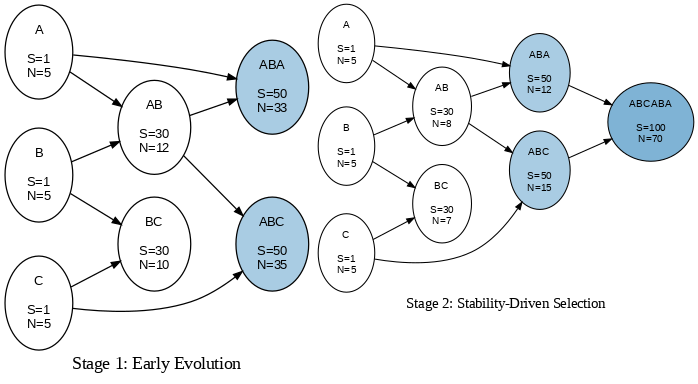

The combined image has been saved as 'sda_evolution_combined.png'

LaTeX code to include the image in your paper:
\begin{figure}
    \centering
    \includegraphics[width=\textwidth]{sda_evolution_combined.png}
    \caption{Evolution of SDA system. Left: Stage 1 with co-dominant ABC and ABA patterns. Right: Stage 2 showing ABCABA emerging as the dominant pattern due to its higher stability.}
    \label{fig:sda_evolution}
\end{figure}


In [ ]:
# Install required packages
!pip install graphviz Pillow

from graphviz import Digraph
from PIL import Image
from IPython.display import display
import os

# Function to create graph with common settings
def create_sda_graph(name, label):
    g = Digraph(name)
    g.attr(rankdir='LR', size="4,4!")
    g.attr('node', shape='ellipse', style='filled', fillcolor='white',
           fontsize='10', fontname='Arial')
    g.attr('edge', color='black', arrowsize='0.7')
    g.attr(label=label)
    return g

# Stage 1: Early Evolution - ABC and ABA are dominant
stage1 = create_sda_graph('stage1', 'Stage 1: Early Evolution')

# Base elements
stage1.node('A', 'A\n\nS=1\nN=5')
stage1.node('B', 'B\n\nS=1\nN=5')
stage1.node('C', 'C\n\nS=1\nN=5')

# First level patterns
stage1.node('AB', 'AB\n\nS=30\nN=12')
stage1.node('BC', 'BC\n\nS=30\nN=10')

# Second level patterns - dominant in stage 1
stage1.node('ABC', 'ABC\n\nS=50\nN=35', fillcolor='#A9CCE3')
stage1.node('ABA', 'ABA\n\nS=50\nN=33', fillcolor='#A9CCE3')

# Connections
stage1.edge('A', 'AB')
stage1.edge('B', 'AB')
stage1.edge('B', 'BC')
stage1.edge('C', 'BC')
stage1.edge('AB', 'ABC')
stage1.edge('C', 'ABC')
stage1.edge('AB', 'ABA')
stage1.edge('A', 'ABA')

# Stage 2: ABCABA dominates
stage2 = create_sda_graph('stage2', 'Stage 2: Stability-Driven Selection')

# Base elements
stage2.node('A', 'A\n\nS=1\nN=5')
stage2.node('B', 'B\n\nS=1\nN=5')
stage2.node('C', 'C\n\nS=1\nN=5')

# First level patterns
stage2.node('AB', 'AB\n\nS=30\nN=8')
stage2.node('BC', 'BC\n\nS=30\nN=7')

# Second level patterns - reduced token counts
stage2.node('ABC', 'ABC\n\nS=50\nN=15', fillcolor='#A9CCE3')
stage2.node('ABA', 'ABA\n\nS=50\nN=12', fillcolor='#A9CCE3')

# Third level pattern - dominant
stage2.node('ABCABA', 'ABCABA\n\nS=100\nN=70', fillcolor='#7FB3D5')

# Connections
stage2.edge('A', 'AB')
stage2.edge('B', 'AB')
stage2.edge('B', 'BC')
stage2.edge('C', 'BC')
stage2.edge('AB', 'ABC')
stage2.edge('C', 'ABC')
stage2.edge('AB', 'ABA')
stage2.edge('A', 'ABA')
stage2.edge('ABC', 'ABCABA')
stage2.edge('ABA', 'ABCABA')

# Render the graphs
stage1.render('stage1', format='png', cleanup=True)
stage2.render('stage2', format='png', cleanup=True)

# Combine the images side by side
img1 = Image.open('stage1.png')
img2 = Image.open('stage2.png')

# Calculate the width and height of the combined image
total_width = img1.width + img2.width
max_height = max(img1.height, img2.height)

# Create a new blank image with the total width and max height
combined_img = Image.new('RGB', (total_width, max_height), color='white')

# Paste the two images side by side
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (img1.width, 0))

# Save and display the combined image
combined_img.save('sda_evolution_combined.png')
display(combined_img)

print("The combined image has been saved as 'sda_evolution_combined.png'")

# For LaTeX users, here's a simple way to include this in your paper:
print("\nLaTeX code to include the image in your paper:")
print(r"""\begin{figure}
    \centering
    \includegraphics[width=\textwidth]{sda_evolution_combined.png}
    \caption{Evolution of SDA system. Left: Stage 1 with co-dominant ABC and ABA patterns. Right: Stage 2 showing ABCABA emerging as the dominant pattern due to its higher stability.}
    \label{fig:sda_evolution}
\end{figure}""")

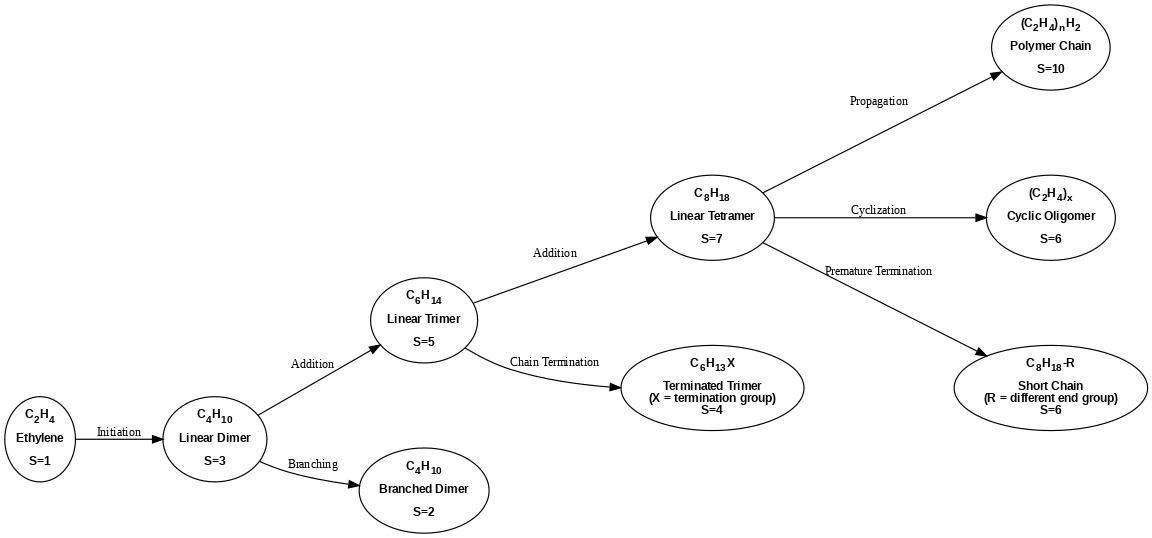

In [ ]:
dot_content = """
digraph Polymerization_Evolution {
    rankdir=LR;
    size="12,7!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=10, fontname="Arial Bold", margin=0.01];
    edge [color=black, arrowsize=0.9, fontsize=10];

    // Base elements and intermediates
    Ethylene [label=<C<sub>2</sub>H<sub>4</sub><br/><br/>Ethylene<br/><br/>S=1>];
    Dimer [label=<C<sub>4</sub>H<sub>8</sub><br/><br/>Dimer<br/><br/>S=3>];
    Trimer [label=<C<sub>6</sub>H<sub>12</sub><br/><br/>Trimer<br/><br/>S=5>];
    Tetramer [label=<C<sub>8</sub>H<sub>16</sub><br/><br/>Tetramer<br/><br/>S=7>];
    Polymer [label=<(C<sub>2</sub>H<sub>4</sub>)<sub>n</sub><br/><br/>Polymer<br/><br/>S=10>];

    // Less stable by-products
    Branched_Dimer [label=<C<sub>4</sub>H<sub>8</sub><br/><br/>Branched Dimer<br/><br/>S=2>];
    Terminated_Trimer [label=<C<sub>6</sub>H<sub>12</sub><br/><br/>Terminated Trimer<br/><br/>S=4>];
    Cyclic_Oligomer [label=<(C<sub>2</sub>H<sub>4</sub>)<sub>x</sub><br/><br/>Cyclic Oligomer<br/><br/>S=6>];
    Short_Chain [label=<(C<sub>2</sub>H<sub>4</sub>)<sub>4</sub><br/><br/>Short Chain<br/><br/>S=6>];

    // Main reaction pathway
    Ethylene -> Dimer [label="Polymerization"];
    Dimer -> Trimer [label="Addition"];
    Trimer -> Tetramer [label="Addition"];
    Tetramer -> Polymer [label="Propagation"];

    // Less stable reaction pathways
    Dimer -> Branched_Dimer [label="Isomerization"];
    Trimer -> Terminated_Trimer [label="Chain Termination"];
    Tetramer -> Cyclic_Oligomer [label="Cyclization"];
    Tetramer -> Short_Chain [label="Premature Termination"];
}

"""

# Write the DOT content to a file
with open("abc_poly.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_poly.dot > abc_poly.png

# Display the rendered image
from IPython.display import Image
Image('abc_poly.png')



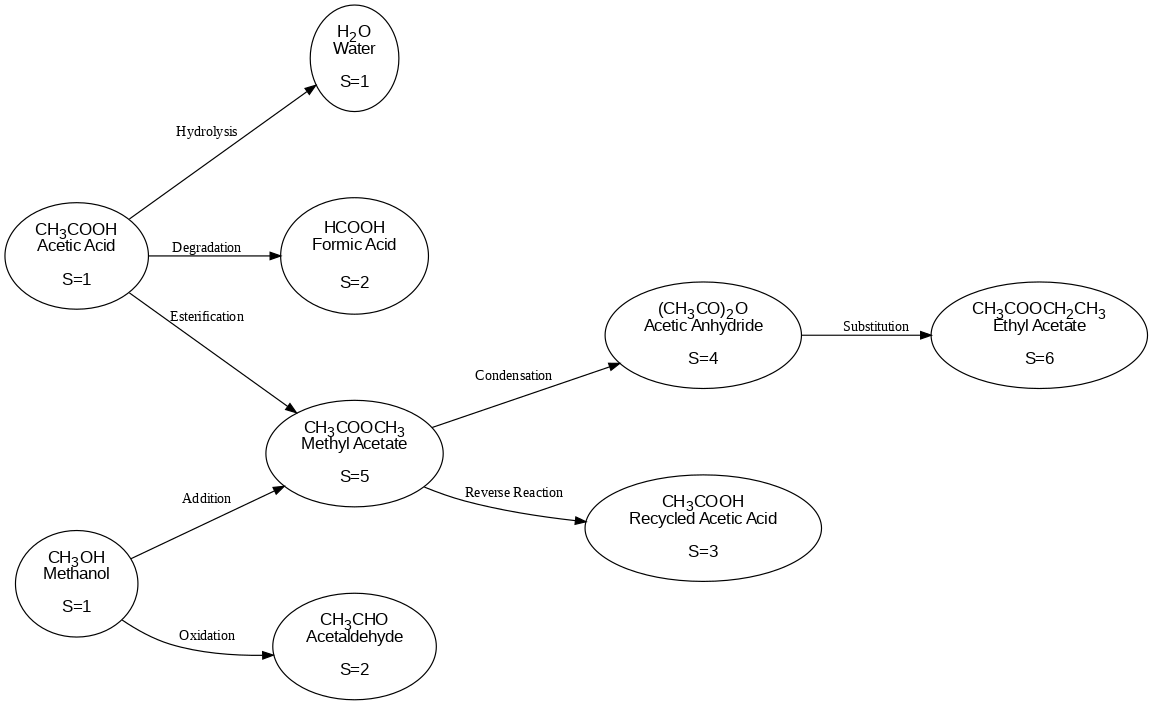

In [ ]:
dot_content = """
digraph Esterification_Hydrolysis {
    rankdir=LR;
    size="12,10!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=14, fontname="Arial"];
    edge [color=black, arrowsize=0.9, fontsize=12];

    // Base molecules and intermediates
    Acetic_Acid [label=<CH<sub>3</sub>COOH<br/>Acetic Acid<br/><br/>S=1>];
    Methanol [label=<CH<sub>3</sub>OH<br/>Methanol<br/><br/>S=1>];
    Methyl_Acetate [label=<CH<sub>3</sub>COOCH<sub>3</sub><br/>Methyl Acetate<br/><br/>S=5>];
    Acetic_Anhydride [label=<(CH<sub>3</sub>CO)<sub>2</sub>O<br/>Acetic Anhydride<br/><br/>S=4>];
    Ethyl_Acetate [label=<CH<sub>3</sub>COOCH<sub>2</sub>CH<sub>3</sub><br/>Ethyl Acetate<br/><br/>S=6>];

    // By-products
    Water [label=<H<sub>2</sub>O<br/>Water<br/><br/>S=1>];
    Formic_Acid [label=<HCOOH<br/>Formic Acid<br/><br/>S=2>];
    Acetaldehyde [label=<CH<sub>3</sub>CHO<br/>Acetaldehyde<br/><br/>S=2>];
    Acetic_Acid_Regen [label=<CH<sub>3</sub>COOH<br/>Recycled Acetic Acid<br/><br/>S=3>];

    // Main reaction pathway
    Acetic_Acid -> Methyl_Acetate [label="Esterification"];
    Methanol -> Methyl_Acetate [label="Addition"];
    Methyl_Acetate -> Acetic_Anhydride [label="Condensation"];
    Acetic_Anhydride -> Ethyl_Acetate [label="Substitution"];

    // Side reactions
    Acetic_Acid -> Water [label="Hydrolysis"];
    Acetic_Acid -> Formic_Acid [label="Degradation"];
    Methanol -> Acetaldehyde [label="Oxidation"];
    Methyl_Acetate -> Acetic_Acid_Regen [label="Reverse Reaction"];
}


"""

# Write the DOT content to a file
with open("abc_hydro.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_hydro.dot > abc_hydro.png

# Display the rendered image
from IPython.display import Image
Image('abc_hydro.png')


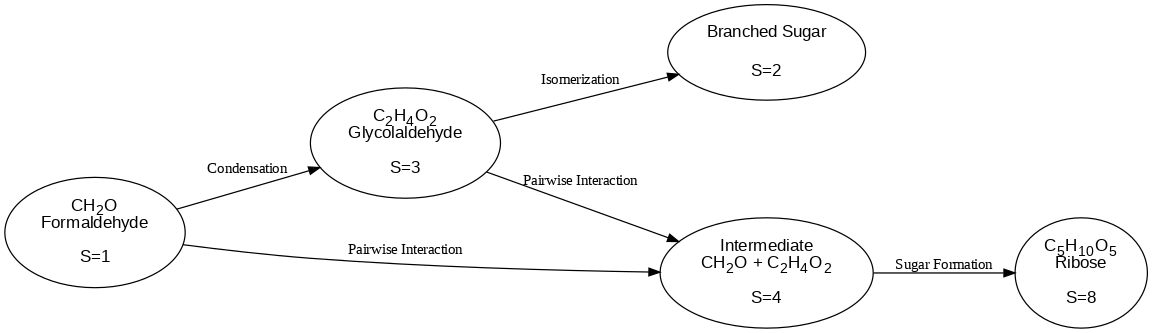

In [ ]:
dot_content = """
digraph RNA_Precursor_Evolution {
    rankdir=LR;
    size="12,8!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=14, fontname="Arial"];
    edge [color=black, arrowsize=0.9, fontsize=12];

    // Main pathway molecules
    Formaldehyde [label=<CH<sub>2</sub>O<br/>Formaldehyde<br/><br/>S=1>];
    Glycolaldehyde [label=<C<sub>2</sub>H<sub>4</sub>O<sub>2</sub><br/>Glycolaldehyde<br/><br/>S=3>];
    Ribose [label=<C<sub>5</sub>H<sub>10</sub>O<sub>5</sub><br/>Ribose<br/><br/>S=8>];

    // Pairwise intermediate nodes
    Formaldehyde_Glycol [label=<Intermediate<br/>CH<sub>2</sub>O + C<sub>2</sub>H<sub>4</sub>O<sub>2</sub><br/><br/>S=4>];

    // Main reaction pathway
    Formaldehyde -> Glycolaldehyde [label="Condensation"];
    Formaldehyde -> Formaldehyde_Glycol [label="Pairwise Interaction"];
    Glycolaldehyde -> Formaldehyde_Glycol [label="Pairwise Interaction"];
    Formaldehyde_Glycol -> Ribose [label="Sugar Formation"];

    // Key less stable intermediates
    Branched_Sugar [label=<Branched Sugar<br/><br/>S=2>];

    // Side reactions
    Glycolaldehyde -> Branched_Sugar [label="Isomerization"];
}





"""

# Write the DOT content to a file
with open("abc_prerna.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_prerna.dot > abc_prerna.png

# Display the rendered image
from IPython.display import Image
Image('abc_prerna.png')


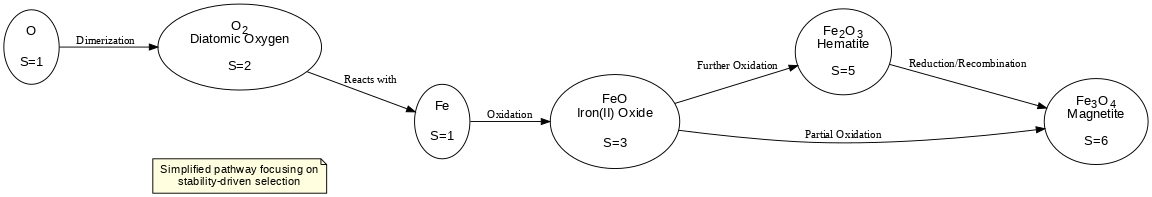

In [ ]:
dot_content = """
digraph Iron_Oxide_Evolution {
    rankdir=LR;
    size="12,8!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=14, fontname="Arial"];
    edge [color=black, arrowsize=0.9, fontsize=12];

    // Base elements
    Fe [label=<Fe<br/><br/>S=1>];
    O [label=<O<br/><br/>S=1>];

    // Intermediates
    O2 [label=<O<sub>2</sub><br/>Diatomic Oxygen<br/><br/>S=2>];
    FeO [label=<FeO<br/>Iron(II) Oxide<br/><br/>S=3>];
    Fe2O3 [label=<Fe<sub>2</sub>O<sub>3</sub><br/>Hematite<br/><br/>S=5>];
    Fe3O4 [label=<Fe<sub>3</sub>O<sub>4</sub><br/>Magnetite<br/><br/>S=6>];

    // Base reactions
    O -> O2 [label="Dimerization"];

    // Fe + O2 reaction
    O2 -> Fe [label="Reacts with"];
    Fe -> FeO [label="Oxidation"];

    // Intermediate reactions
    FeO -> Fe2O3 [label="Further Oxidation"];
    FeO -> Fe3O4 [label="Partial Oxidation"];

    // Final pathways
    Fe2O3 -> Fe3O4 [label="Reduction/Recombination"];

    // Note as invisible node
    note [shape=note, label="Simplified pathway focusing on\nstability-driven selection", fontsize=12, fillcolor=lightyellow];
    note -> Fe [style=invis];
}



"""

# Write the DOT content to a file
with open("abc_oxi.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_oxi.dot > abc_oxi.png

# Display the rendered image
from IPython.display import Image
Image('abc_oxi.png')


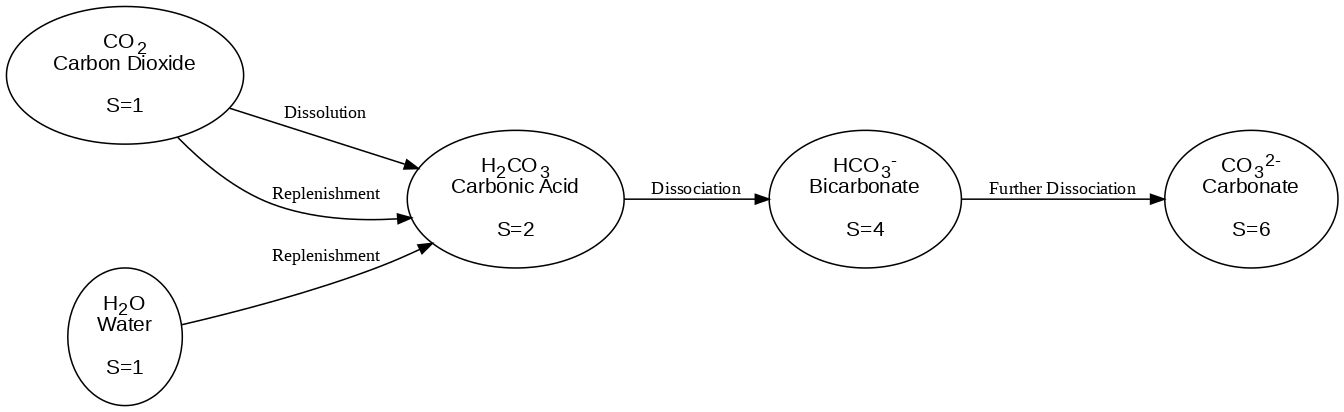

In [ ]:
dot_content = """
digraph Carbonate_Formation {
    rankdir=LR;
    size="14,8!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=14, fontname="Arial"];
    edge [color=black, arrowsize=0.9, fontsize=12];

    // Nodes representing compounds
    CO2 [label=<CO<sub>2</sub><br/>Carbon Dioxide<br/><br/>S=1>];
    H2O [label=<H<sub>2</sub>O<br/>Water<br/><br/>S=1>];
    H2CO3 [label=<H<sub>2</sub>CO<sub>3</sub><br/>Carbonic Acid<br/><br/>S=2>];
    HCO3 [label=<HCO<sub>3</sub><sup>-</sup><br/>Bicarbonate<br/><br/>S=4>];
    CO3 [label=<CO<sub>3</sub><sup>2-</sup><br/>Carbonate<br/><br/>S=6>];

    // Main reaction pathway
    CO2 -> H2CO3 [label="Dissolution"];
    H2CO3 -> HCO3 [label="Dissociation"];
    HCO3 -> CO3 [label="Further Dissociation"];

    // Input and replenishment
    CO2 -> H2CO3 [label="Replenishment"];
    H2O -> H2CO3 [label="Replenishment"];
}

"""

#Write the DOT content to a file
with open("abc_carb.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_carb.dot > abc_carb.png

# Display the rendered image
from IPython.display import Image
Image('abc_carb.png')

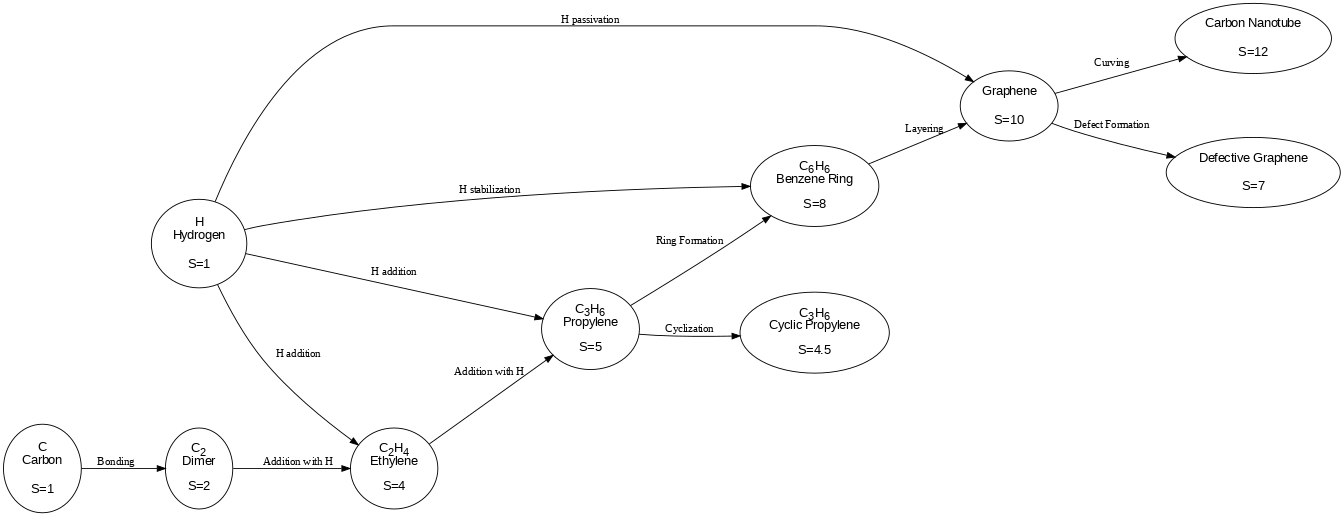

In [ ]:
dot_content = """
digraph Nanostructure_Assembly {
    rankdir=LR;
    size="14,8!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=14, fontname="Arial"];
    edge [color=black, arrowsize=0.9, fontsize=12];

    // Base elements and intermediates
    C [label=<C<br/>Carbon<br/><br/>S=1>];
    H [label=<H<br/>Hydrogen<br/><br/>S=1>];
    C2 [label=<C<sub>2</sub><br/>Dimer<br/><br/>S=2>];
    C2H4 [label=<C<sub>2</sub>H<sub>4</sub><br/>Ethylene<br/><br/>S=4>];
    C3H6 [label=<C<sub>3</sub>H<sub>6</sub><br/>Propylene<br/><br/>S=5>];
    Benzene [label=<C<sub>6</sub>H<sub>6</sub><br/>Benzene Ring<br/><br/>S=8>];
    Graphene [label=<Graphene<br/><br/>S=10>];
    Nanotube [label=<Carbon Nanotube<br/><br/>S=12>];

    // Less stable intermediates
    Cyclic_C3H6 [label=<C<sub>3</sub>H<sub>6</sub><br/>Cyclic Propylene<br/><br/>S=4.5>];
    Defective_Graphene [label=<Defective Graphene<br/><br/>S=7>];

    // Main reaction pathway
    C -> C2 [label="Bonding"];
    C2 -> C2H4 [label="Addition with H"];
    C2H4 -> C3H6 [label="Addition with H"];
    C3H6 -> Benzene [label="Ring Formation"];
    Benzene -> Graphene [label="Layering"];
    Graphene -> Nanotube [label="Curving"];

    // Hydrogen flow connections
    H -> C2H4 [label="H addition"];
    H -> C3H6 [label="H addition"];
    H -> Benzene [label="H stabilization"];
    H -> Graphene [label="H passivation"];

    // Less stable pathways
    C3H6 -> Cyclic_C3H6 [label="Cyclization"];
    Graphene -> Defective_Graphene [label="Defect Formation"];
}






"""


# Write the DOT content to a file
with open("abc_nano.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_nano.dot > abc_nano.png

# Display the rendered image
from IPython.display import Image
Image('abc_nano.png')

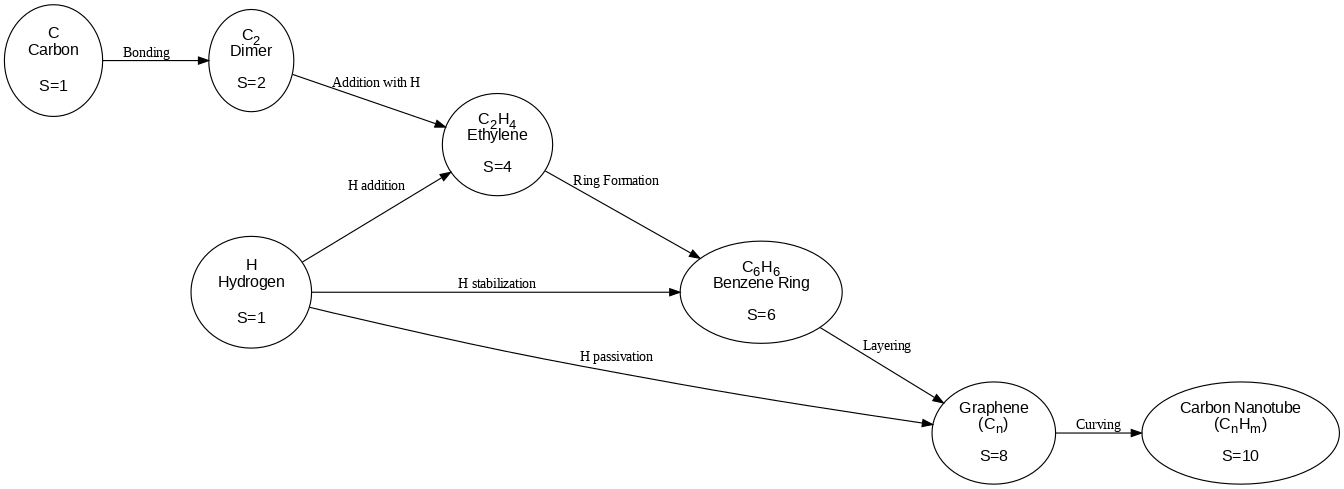

In [ ]:
import graphviz

# Define the DOT graph content
dot_content = """
digraph Simplified_Nanostructure_Assembly {
    rankdir=LR;
    size="14,8!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=14, fontname="Arial"];
    edge [color=black, arrowsize=0.9, fontsize=12];

    // Base elements and intermediates
    C [label=<C<br/>Carbon<br/><br/>S=1>];
    H [label=<H<br/>Hydrogen<br/><br/>S=1>];
    C2 [label=<C<sub>2</sub><br/>Dimer<br/><br/>S=2>];
    C2H4 [label=<C<sub>2</sub>H<sub>4</sub><br/>Ethylene<br/><br/>S=4>];
    Benzene [label=<C<sub>6</sub>H<sub>6</sub><br/>Benzene Ring<br/><br/>S=6>];
    Graphene [label=<Graphene<br/>(C<sub>n</sub>)<br/><br/>S=8>];
    Nanotube [label=<Carbon Nanotube<br/>(C<sub>n</sub>H<sub>m</sub>)<br/><br/>S=10>];

    // Main reaction pathway
    C -> C2 [label="Bonding"];
    C2 -> C2H4 [label="Addition with H"];
    C2H4 -> Benzene [label="Ring Formation"];
    Benzene -> Graphene [label="Layering"];
    Graphene -> Nanotube [label="Curving"];

    // Hydrogen flow connections
    H -> C2H4 [label="H addition"];
    H -> Benzene [label="H stabilization"];
    H -> Graphene [label="H passivation"];
}
"""

# Write the DOT content to a file
with open("abc_nano.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_nano.dot > abc_nano.png

# Display the rendered image
from IPython.display import Image
Image('abc_nano.png')

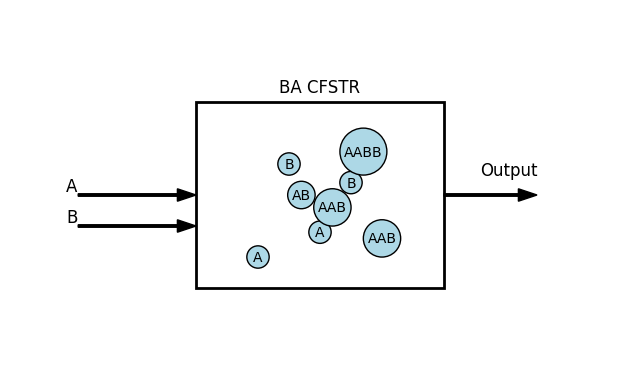

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def draw_ba_cfstr_figure():
    fig, ax = plt.subplots(figsize=(8,5))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.set_aspect('equal')
    ax.axis('off')

    # Tank rectangle (the CFSTR)
    tank_left, tank_bottom = 3, 1.5
    tank_width, tank_height = 4, 3
    tank = patches.Rectangle((tank_left, tank_bottom), tank_width, tank_height,
                             linewidth=2, edgecolor='black', facecolor='white')
    ax.add_patch(tank)

    # Label the "Tank"
    ax.text(tank_left + tank_width/2, tank_bottom + tank_height + 0.1,
            "BA CFSTR", fontsize=12, ha='center', va='bottom')

    # Inputs on the left (arrows labeled "A" and "B")
    # We'll draw them as arrow lines pointing into the tank
    ax.arrow(1.1, 3.0, 1.9, 0.0, width=0.04,
             head_width=0.2, head_length=0.3,
             length_includes_head=True, color='black')
    ax.text(1, 3, "A", fontsize=12, ha='center', va='bottom')

    ax.arrow(1.1, 2.5, 1.9, 0.0, width=0.04,
             head_width=0.2, head_length=0.3,
             length_includes_head=True, color='black')
    ax.text(1.0, 2.5, "B", fontsize=12, ha='center', va='bottom')

    # Output arrow on the right
    # We'll have it come out from the middle of the tank's right boundary
    ax.arrow(tank_left + tank_width, tank_bottom + tank_height/2,
             1.5, 0.0, width=0.04,
             head_width=0.2, head_length=0.3,
             length_includes_head=True, color='black')
    ax.text(tank_left + tank_width + 1.05, tank_bottom + tank_height/2 + 0.25,
            "Output", fontsize=12, ha='center', va='bottom')

    # Place “floating” elements/compounds inside the tank
    # We'll position them roughly in a grid or random arrangement.
    # Adjust coordinates as needed for clarity.

    inside_positions = [
        (4.0, 2.0),  # A
        (4.5, 3.5),  # B
        (5.0, 2.4),  # A
        (5.5, 3.2),  # B
        (5.2, 2.8),  # AAB
        (6.0, 2.3),  # AAB
        (4.7, 3.0),  # AB
        (5.7, 3.7),  # AABB
    ]

    labels = [
        "A",
        "B",
        "A",
        "B",
        "AAB",
        "AAB",
        "AB",
        "AABB"
    ]

    for (xx, yy), lab in zip(inside_positions, labels):
        ax.text(xx, yy, lab, fontsize=10, ha='center', va='center',
                bbox=dict(boxstyle="circle,pad=0.3", fc="lightblue", ec="black", lw=1))

    plt.show()

# Call the function to produce and display the figure
draw_ba_cfstr_figure()


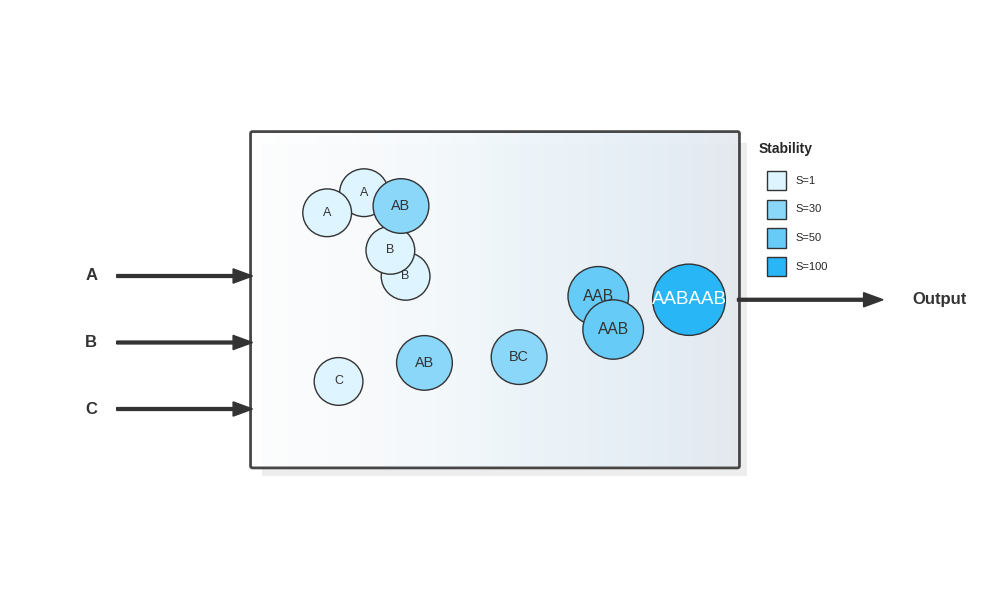

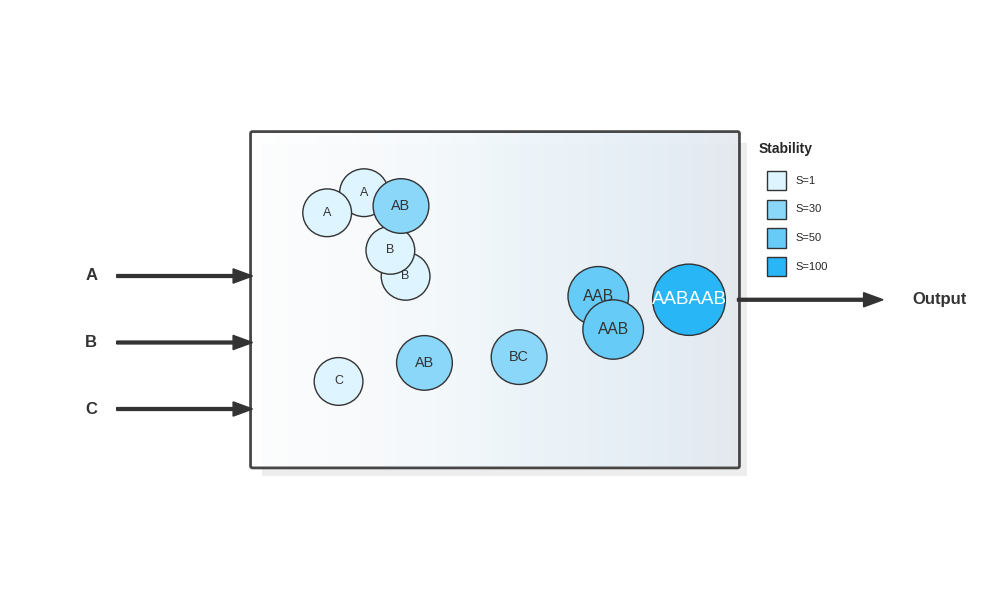

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def create_enhanced_sda_cfstr():
    # Set up the figure with a cleaner style
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor('white')
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.set_aspect('equal')
    ax.axis('off')

    # Define a nice color palette
    base_color = '#E1F5FE'  # Light blue
    stable_color = '#81D4FA'  # Medium blue
    more_stable_color = '#4FC3F7'  # Deeper blue
    most_stable_color = '#29B6F6'  # Even deeper blue

    # Create custom colormap for stability gradients
    stability_colors = [base_color, stable_color, more_stable_color, most_stable_color]
    stability_cmap = LinearSegmentedColormap.from_list("stability", stability_colors, N=100)

    # Tank rectangle (with rounded corners and gradient fill)
    tank_left, tank_bottom = 2.5, 1.2
    tank_width, tank_height = 5, 3.5

    # Add a subtle shadow for depth
    shadow = patches.Rectangle((tank_left+0.1, tank_bottom-0.1),
                               tank_width, tank_height,
                               linewidth=0, facecolor='#DDDDDD', alpha=0.5,
                               zorder=1)
    ax.add_patch(shadow)

    # Main tank with rounded corners
    tank = patches.FancyBboxPatch((tank_left, tank_bottom),
                                 tank_width, tank_height,
                                 boxstyle=patches.BoxStyle("Round", pad=0.02),
                                 linewidth=2, edgecolor='#333333',
                                 facecolor='white', alpha=0.9,
                                 zorder=2)
    ax.add_patch(tank)

    # Add a subtle gradient inside the tank for visual appeal
    gradient = np.linspace(0, 1, 100).reshape(1, -1)
    gradient = np.vstack((gradient, gradient))

    # Position the gradient image inside the tank
    ax.imshow(gradient, cmap=plt.cm.Blues, alpha=0.1,
             extent=[tank_left, tank_left+tank_width,
                     tank_bottom, tank_bottom+tank_height],
             aspect='auto', zorder=2)


    # Enhanced input arrows with better styling
    # Create a function for consistent arrow styling
    def draw_styled_arrow(ax, x1, y1, dx, dy, label, label_pos='left', width=0.03):
        arrow = ax.arrow(x1, y1, dx, dy, width=width,
                        head_width=0.15, head_length=0.2,
                        length_includes_head=True, color='#333333',
                        zorder=3)

        # Position the label based on direction
        if label_pos == 'left':
            ax.text(x1-0.2, y1, label, fontsize=12, ha='right', va='center',
                   fontweight='bold', color='#333333')
        elif label_pos == 'right':
            ax.text(x1+dx+0.3, y1, label, fontsize=12, ha='left', va='center',
                   fontweight='bold', color='#333333')
        return arrow

    # Input arrows with better spacing
    draw_styled_arrow(ax, 1.1, 3.2, 1.4, 0, "A", 'left')
    draw_styled_arrow(ax, 1.1, 2.5, 1.4, 0, "B", 'left')
    draw_styled_arrow(ax, 1.1, 1.8, 1.4, 0, "C", 'left')

    # Output arrow
    draw_styled_arrow(ax, tank_left + tank_width, tank_bottom + tank_height/2,
                     1.5, 0, "Output", 'right')



    # Define stability legend
    stability_values = {
        "A": 1,
        "B": 1,
        "C": 1,
        "AB": 30,
        "BC": 30,
        "AAB": 50,
        "ABC": 50,
        "AABB": 100
    }

    # A function to create compounds with stability-based styling
    def create_compound(label, x, y, stability=1):
        # Map stability to color using our colormap
        # Normalize to 0-1 range (assuming max stability is 100)
        norm_stability = min(1.0, stability/100)
        color = stability_cmap(norm_stability)

        # Calculate size based on stability (more stable = slightly larger)
        size_factor = 1.0 + 0.5 * norm_stability

        # Circle with compound
        compound = patches.Circle((x, y), 0.25 * size_factor,
                                 facecolor=color,
                                 edgecolor='#333333',
                                 linewidth=1,
                                 zorder=5)
        ax.add_patch(compound)

        #Add label
        ax.text(x, y, label, fontsize=9 * size_factor,
                ha='center', va='center',
                color='#333333' if norm_stability < 0.7 else 'white',
                zorder=6)


    # Place compounds with pseudo-random but balanced distribution
    # Generate more natural-looking positions using golden ratio
    np.random.seed(42)  # For reproducibility

    # Base elements (more abundant at inputs)
    for i, label in enumerate(["A", "B", "C", "A", "B"]):
        x = tank_left + 0.7 + np.random.rand() * 1.2
        y = tank_bottom + 0.5 + np.random.rand() * (tank_height - 1)
        create_compound(label, x, y, stability_values[label])

    # First-level compounds (mid-tank)
    for i, label in enumerate(["AB", "BC", "AB"]):
        x = tank_left + 1.5 + np.random.rand() * 1.5
        y = tank_bottom + 0.7 + np.random.rand() * (tank_height - 1.4)
        create_compound(label, x, y, stability_values[label])

    # Second-level compounds (mid to right)
    for label in ["AAB", "AAB"]:
        x = tank_left + 3.2 + np.random.rand() * 1.2
        y = tank_bottom + 1.0 + np.random.rand() * (tank_height - 2.0)
        create_compound(label, x, y, stability_values[label])

    # Most stable compound (right side)
    create_compound("AABAAB", tank_left + 4.5, tank_bottom + tank_height/2, stability_values["AABB"])

    # Add a legend for stability
    ax.text(8, 4.5, "Stability", fontsize=10, ha='center', fontweight='bold')
    for i, (s, label) in enumerate([(1, "Low"), (30, "Medium"), (50, "High"), (100, "Very High")]):
        y_pos = 4.2 - i*0.3
        norm_s = min(1.0, s/100)
        color = stability_cmap(norm_s)
        legend_patch = patches.Rectangle((7.8, y_pos-0.1), 0.2, 0.2,
                                         facecolor=color, edgecolor='#333333', linewidth=1)
        ax.add_patch(legend_patch)
        ax.text(8.1, y_pos, f"S={s}", fontsize=8, ha='left', va='center')

    # Save and show the figure
    plt.tight_layout()
    plt.savefig('sda_cfstr_enhanced.png', dpi=300, bbox_inches='tight')
    plt.show()

    return fig

create_enhanced_sda_cfstr()

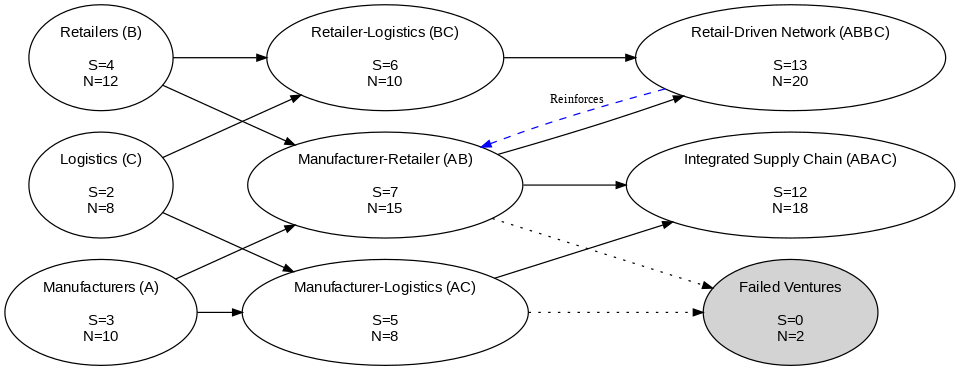

In [ ]:
dot_content = """
digraph SDA_Economic_Ecosystem {
    rankdir=LR;
    size="10,7!";
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=12, fontname="Arial"];
    edge [color=black, arrowsize=0.8, fontsize=10];

    // Base elements
    A [label="Manufacturers (A)\n\nS=3\nN=10"];
    B [label="Retailers (B)\n\nS=4\nN=12"];
    C [label="Logistics (C)\n\nS=2\nN=8"];

    // Stage 1 Nodes
    AB [label="Manufacturer-Retailer (AB)\n\nS=7\nN=15"];
    AC [label="Manufacturer-Logistics (AC)\n\nS=5\nN=8"];
    BC [label="Retailer-Logistics (BC)\n\nS=6\nN=10"];
    Failed [label="Failed Ventures\n\nS=0\nN=2", fillcolor=lightgray, style=filled];

    // Stage 2 Nodes
    ABAC [label="Integrated Supply Chain (ABAC)\n\nS=12\nN=18"];
    ABBC [label="Retail-Driven Network (ABBC)\n\nS=13\nN=20"];

    // Connections
    A -> AB;
    B -> AB;
    A -> AC;
    C -> AC;
    B -> BC;
    C -> BC;

    AB -> ABAC;
    AC -> ABAC;
    AB -> ABBC;
    BC -> ABBC;

    // Failure pathways
    AB -> Failed [style=dotted];
    AC -> Failed [style=dotted];

    // Add simple feedback loop
    ABBC -> AB [style=dashed, color=blue, label="Reinforces"];
}
"""


# Write the DOT content to a file
with open("abc_eco.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_eco.dot > abc_eco.png

# Display the rendered image
from IPython.display import Image
Image('abc_eco.png')

Graph has been generated and saved as 'ba_ecosystem.png'.


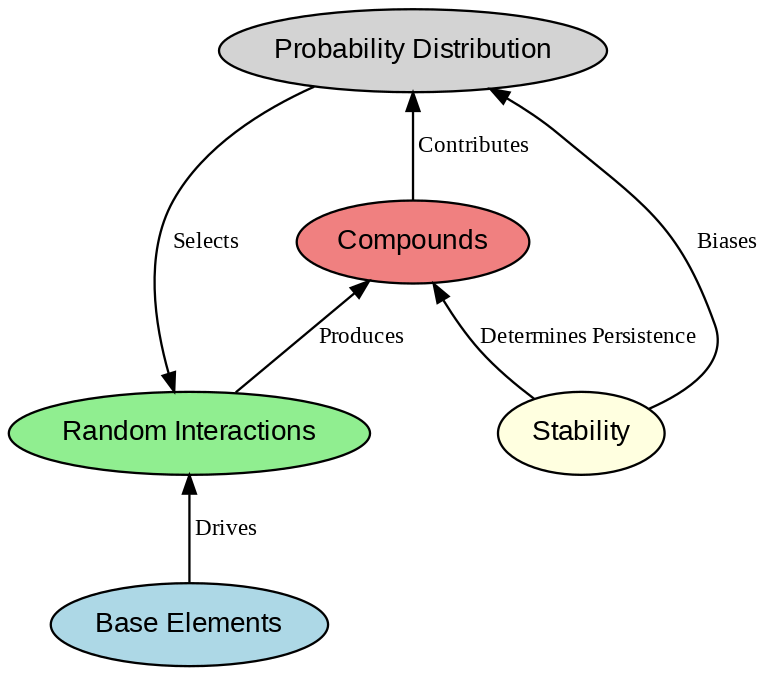

In [ ]:
from graphviz import Digraph

dot_content = """
digraph BA_Ecosystem {
    rankdir=BT; // Bottom-To-Top layout
    size="8,8!"; // Adjust the canvas size
    ranksep=0.5; // Vertical spacing between ranks
    nodesep=0.7; // Horizontal spacing between nodes
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=12, fontname="Arial"];
    edge [color=black, arrowsize=0.8, fontsize=10];

    // Nodes
    BaseElements [label="Base Elements", fillcolor=lightblue];
    RandomInteractions [label="Random Interactions", fillcolor=lightgreen];
    Compounds [label="Compounds", fillcolor=lightcoral];
    Stability [label="Stability", fillcolor=lightyellow];
    ProbDist [label="Probability Distribution", fillcolor=lightgray];

    // Edges
    BaseElements -> RandomInteractions [label=" Drives"];
    RandomInteractions -> Compounds [label=" Produces"];
    Stability -> Compounds [label="Determines Persistence"];
    Stability -> ProbDist [label="Biases"];
    ProbDist -> RandomInteractions [label="Selects"];
    Compounds -> ProbDist [label=" Contributes"];
}
"""


# Render the graph
graph = Source(dot_content)
graph.render("ba_ecosystem", format="png", cleanup=True)
print("Graph has been generated and saved as 'ba_ecosystem.png'.")

# Display the rendered image
from IPython.display import Image
Image('ba_ecosystem.png')



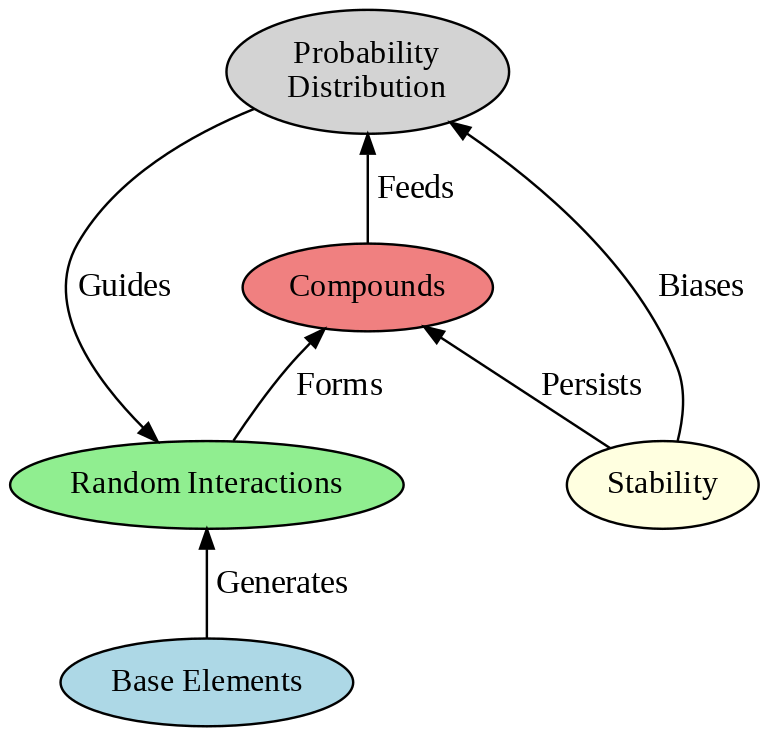

In [ ]:
from graphviz import Digraph

dot_content = """
digraph BA_Ecosystem {
    // Force a circular shape by specifying rank separation
    // and avoiding strict top-to-bottom ranks
    rankdir=BT;
    size="8,8!";
    ranksep=0.4;
    nodesep=0.8;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=13];
    edge [color=black, arrowsize=0.8];

    // Place nodes in approximate circular order
    // (Adjust positions with "rank" or "constraint" attributes if needed)
    BaseElements    [label="Base Elements", fillcolor=lightblue];
    RandomInteractions [label="Random Interactions", fillcolor=lightgreen];
    Compounds       [label="Compounds", fillcolor=lightcoral];
    ProbDist        [label="Probability\nDistribution", fillcolor=lightgray];
    Stability       [label="Stability", fillcolor=lightyellow];

    // Approximate ring connections
    BaseElements    -> RandomInteractions [label=" Generates"];
    RandomInteractions -> Compounds       [label=" Forms"];
    Compounds       -> ProbDist          [label=" Feeds"];
    ProbDist        -> RandomInteractions [label="Guides"];
    Stability       -> Compounds         [label="Persists"];
    Stability       -> ProbDist          [label="Biases"];
    // Optionally link Compounds -> Stability or other edges if desired
}

"""

# Write the DOT content to a file
with open("ba_ecosystem.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng ba_ecosystem.dot > ba_ecosystem.png

# Display the rendered image
from IPython.display import Image
Image('ba_ecosystem.png')